# Exploratory Data Analysis

In [2]:
# Importing Libraries and Loading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('used_cars_data.csv')

In [4]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


#### Data Understanding

In [6]:
df.shape

(7253, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [8]:
# missing data
df.isna().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

In [9]:
# percentage of missing data
((df.isna().sum().sort_values(ascending=False)) / len(df)) * 100

New_Price            86.129877
Price                17.013650
Seats                 0.730732
Engine                0.634220
Power                 0.634220
Mileage               0.027575
S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
dtype: float64

In [10]:
# duplicate 
df.duplicated().sum()

0

In [11]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [12]:
df.Mileage

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
7248    20.54 kmpl
7249    17.21 kmpl
7250    23.08 kmpl
7251     17.2 kmpl
7252     10.0 kmpl
Name: Mileage, Length: 7253, dtype: object

In [13]:
# Solving the data type issue on Mileage, Engine, and Power columns
df['Mileage'] = df.Mileage.str.extract(r'(\d+\.\d+)')

In [14]:
df.Engine

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
7248    1598 CC
7249    1197 CC
7250    1461 CC
7251    1197 CC
7252    2148 CC
Name: Engine, Length: 7253, dtype: object

In [15]:
df.Engine = df.Engine.str.replace('CC', '')

In [16]:
df.Power

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
7248    103.6 bhp
7249    103.6 bhp
7250     63.1 bhp
7251    103.6 bhp
7252      170 bhp
Name: Power, Length: 7253, dtype: object

In [17]:
df.Power = df.Power.str.extract(r'(\d+\.\d+)')

In [18]:
df.Power

0       58.16
1       126.2
2        88.7
3       88.76
4       140.8
        ...  
7248    103.6
7249    103.6
7250     63.1
7251    103.6
7252      NaN
Name: Power, Length: 7253, dtype: object

In [19]:
df.Power

0       58.16
1       126.2
2        88.7
3       88.76
4       140.8
        ...  
7248    103.6
7249    103.6
7250     63.1
7251    103.6
7252      NaN
Name: Power, Length: 7253, dtype: object

In [20]:
df.New_Price          

0             NaN
1             NaN
2       8.61 Lakh
3             NaN
4             NaN
          ...    
7248          NaN
7249          NaN
7250          NaN
7251          NaN
7252          NaN
Name: New_Price, Length: 7253, dtype: object

In [21]:
df.New_Price = df.New_Price.str.extract(r'(\d+\.\d+)')

In [22]:
df.New_Price

0        NaN
1        NaN
2       8.61
3        NaN
4        NaN
        ... 
7248     NaN
7249     NaN
7250     NaN
7251     NaN
7252     NaN
Name: New_Price, Length: 7253, dtype: object

In [23]:
# Convert data type
df['Mileage'] = df['Mileage'].astype(float)
df['Engine'] = df['Engine'].astype(float)
df['Power'] = df['Power'].astype(float)
df['Seats'] = df['Seats'].astype(float)
df['New_Price'] = df['New_Price'].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              4464 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          989 non-null    float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


#### Feature Engineering
Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

**Create a Car_Age Feature**\
Since the Year column represents the manufacturing year of the car, you can calculate the car's age as the difference between the current year and the manufacturing year.

In [26]:
from datetime import date

current_year = date.today().year
current_year

2025

In [27]:
df['Car_Age'] = current_year - df['Year']

**Split Name into Brand and Model**\
Since car names are unlikely to be strong predictors of price in their current form, we will process this column to extract more meaningful information. Specifically, we will split the 'Name' column into two new columns: 'Brand' and 'Model'. The 'Brand' will capture the first part of the car name, while 'Model' will combine the subsequent parts. 

In [29]:
df.Name

0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7248                    Volkswagen Vento Diesel Trendline
7249                               Volkswagen Polo GT TSI
7250                               Nissan Micra Diesel XV
7251                               Volkswagen Polo GT TSI
7252    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7253, dtype: object

In [30]:
df['Brand'] = df['Name'].str.split().str.get(0)
df['Model'] = df['Name'].str.split().str.get(1) + ' ' + df['Name'].str.split().str.get(2)

In [31]:
df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [32]:
list = ['Isuzu', 'ISUZU', 'Mini', 'Land']

In [33]:
df[df['Brand'].str.contains('|'.join(list))].sample(5)

df['Brand'].replace({'ISUZU': 'Isuzu',
                     'Mini': 'Mini Cooper',
                     'Land': 'Land Roover'}, inplace=True)

In [34]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Roover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [35]:
df['Final_Price'] = np.where(df['New_Price'].notna(), df['New_Price'], df['Price'])

In [36]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Final_Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,15,Maruti,Wagon R,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10,Hyundai,Creta 1.6,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,14,Honda,Jazz V,8.61
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,13,Maruti,Ertiga VDI,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,12,Audi,A4 New,17.74


In [37]:
# Drop unnecessary columns
# drop the 
df = df.drop(['S.No.', 'Name', 'New_Price', 'Price'], axis=1)

In [38]:
df.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Age,Brand,Model,Final_Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,15,Maruti,Wagon R,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,10,Hyundai,Creta 1.6,12.50


Our Data is ready to perform EDA.

#### EDA Exploratory Data 

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

- EDA can be leveraged to check for outliers, patterns, and trends in the given data.
- EDA helps to find meaningful patterns in data.
- EDA provides in-depth insights into the data sets to solve our business problems.
- EDA gives a clue to impute missing values in the dataset

##### Statistics Summary
The summary statistics provide a quick and straightforward description of the dataset. This includes metrics such as count, mean, standard deviation, median, mode, minimum and maximum values, range, and more. By examining these statistics, we can identify potential outliers, data entry errors, and understand the distribution of the data, such as whether it is normally distributed or skewed.

In Python, this can be achieved using the describe() function. The describe() function generates a comprehensive statistical summary for numerical data types, including integers and floats, offering insights into the dataset's characteristics and distribution.

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.17,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.00,1493.00,1968.0000,5998.00
Power,4464.0,106.266843,46.408887,34.20,78.90,88.80,121.3600,488.10
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.0000,10.00
Car_Age,7253.0,11.634634,3.254421,6.00,9.00,11.00,14.0000,29.00
Final_Price,6198.0,10.607217,13.035079,0.44,3.60,5.99,11.2975,120.00


From the statistics summary, we can infer the below findings :

- Years range from 1996- 2019 and has a high in a range which shows used cars contain both latest models and old model cars.
- On average of Kilometers-driven in Used cars are ~58k KM. The range shows a huge difference between min and max as max values show 650000 KM shows the evidence of an outlier. This record can be removed.
- Min value of Mileage shows 0 cars won’t be sold with 0 mileage. This sounds like a data entry issue.
- It looks like Engine and Power have outliers, and the data is right-skewed.
- The average number of seats in a car is 5. car seat is an important feature in price contribution.
- The max price of a used car is 120k which is quite weird, such a high price for used cars. There may be an outlier or data entry issue.

#### Unvariate Analysis

Univariate analysis is performed on both categorical and numerical variables to understand their individual distributions and characteristics.

- Categorical Variables: These can be visualized using count plots, bar charts, pie charts, etc., to show the frequency and distribution of different categories.

- Numerical Variables: For numerical variables, visualization techniques such as histograms, box plots, and density plots are used to reveal the distribution, skewness, and presence of outliers.

In our analysis, we have used histograms and box plots to explore continuous variables. These visualizations help identify patterns, skewness, and outliers within the data, providing insights into the distribution and variability of each variable."

In [45]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(include= np.number).columns

In [46]:
print(cat_col)
print(num_col)

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')
Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Car_Age', 'Final_Price'],
      dtype='object')


Year 
 Skew = -0.8398161508976376


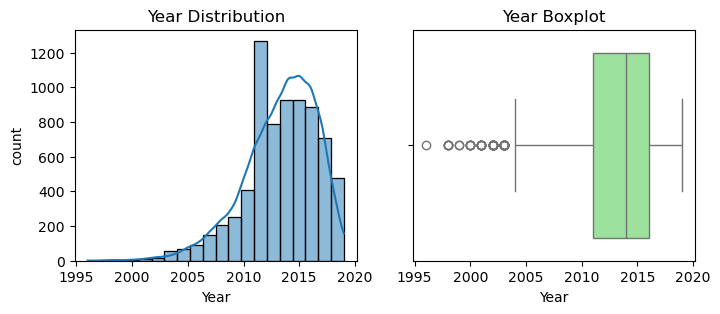

Kilometers_Driven 
 Skew = 61.582574656174806


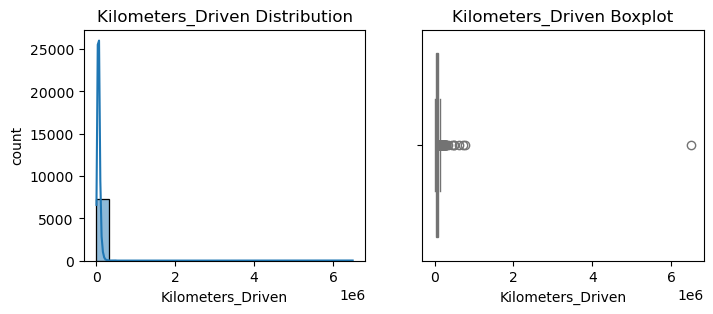

Mileage 
 Skew = -0.4383205657235177


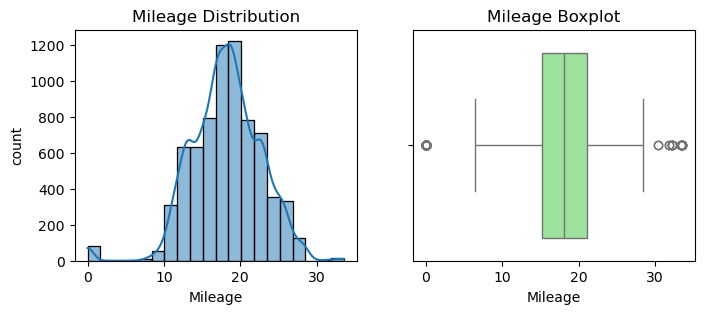

Engine 
 Skew = 1.4124125381446186


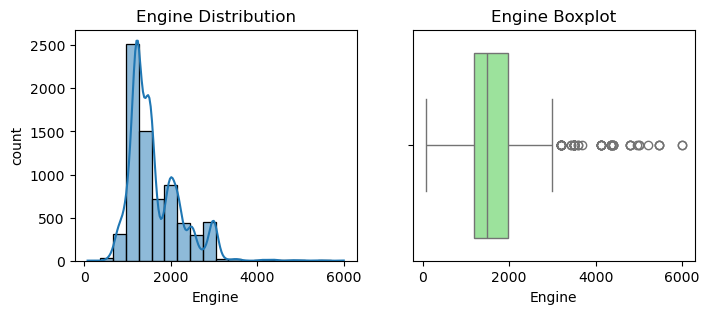

Power 
 Skew = 1.8475821836813315


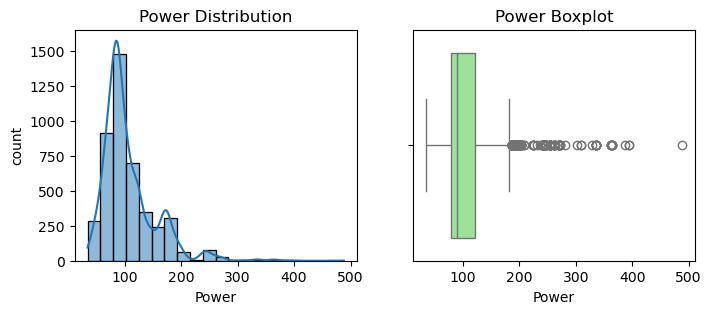

Seats 
 Skew = 1.9022619640428065


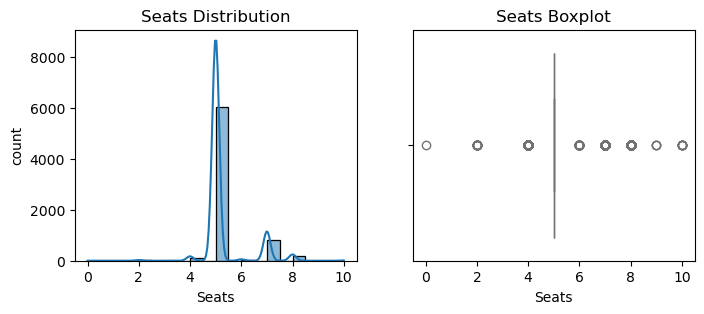

Car_Age 
 Skew = 0.8398161508976897


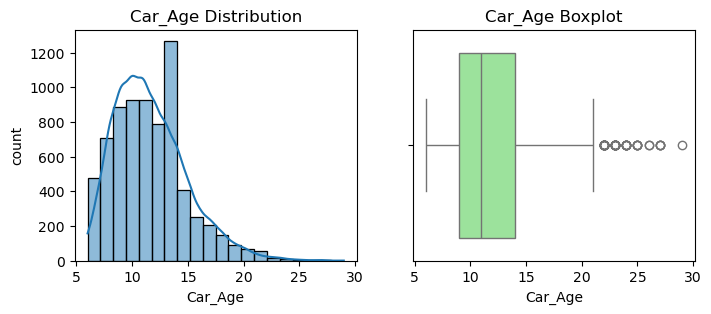

Final_Price 
 Skew = 3.0399381932129272


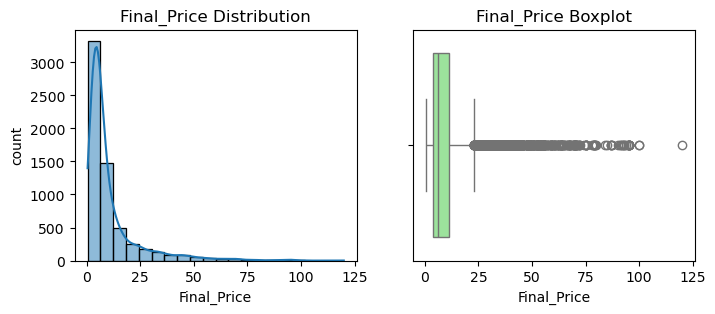

In [47]:
# loop through numerical columns
for col in num_col:
    skewness = df[col].skew()
    print(f'{col} \n Skew = {skewness}')
    plt.figure(figsize=(8,3))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel("count")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color= 'lightgreen')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)
    plt.show()
    plt.show()

Price and Kilometers Driven are right-skewed in this dataset. To address this, we will perform transformations on these variables and handle outliers during the imputation process.

Categorical variables are visualized using count plots. These visualizations reveal the distribution and patterns of different categories, which can help in understanding the factors that influence car prices.

In [49]:
print(df.Model.unique())
print(df.Model.nunique())

['Wagon R' 'Creta 1.6' 'Jazz V' 'Ertiga VDI' 'A4 New' 'EON LPG'
 'Micra Diesel' 'Innova Crysta' 'Vento Diesel' 'Indica Vista' 'Ciaz Zeta'
 'City 1.5' 'Swift VDI' 'Rover Range' 'Rover Freelander' 'Pajero Sport'
 'Amaze S' 'Swift DDiS' 'Duster 85PS' 'New C-Class' '3 Series' 'S Cross'
 'A6 2011-2015' 'i20 1.2' 'Vento Petrol' 'City Corporate' 'Alto K10'
 'WRV i-VTEC' 'Innova 2.5' 'Duster 110PS' 'Corolla Altis'
 'Ssangyong Rexton' 'A6 2.7' 'Vento 1.6' 'Vitara Brezza' 'KUV 100'
 'M-Class ML' 'Polo Diesel' 'Alto LXi' 'Nano LX' 'i20 Magna' 'Elantra 2.0'
 'Elantra CRDi' 'Xcent 1.1' 'Thar CRDe' 'A4 2.0' 'Swift LDI' 'Swift Ldi'
 'Grand i10' 'Vento 2013-2015' 'KWID RXT' 'i10 Asta' 'X-Trail SLX'
 'Zen Estilo' 'Figo Diesel' 'Indica V2' 'City ZX' 'C-Class Progressive'
 'Ertiga SHVS' 'Creta 1.4' 'Cayenne 2009-2014' 'XUV500 W8' 'i10 Sportz'
 'Terrano XV' 'Brio VX' 'A6 2.0' 'Fiesta 1.4' 'Innova 2.0' 'Santro Xing'
 'Zest Revotron' 'Amaze SX' 'Ritz VDi' 'City i' '5 Series' 'Fortuner 4x2'
 'Ecosport 1.5' '

In [50]:
df.Location.value_counts()

Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64

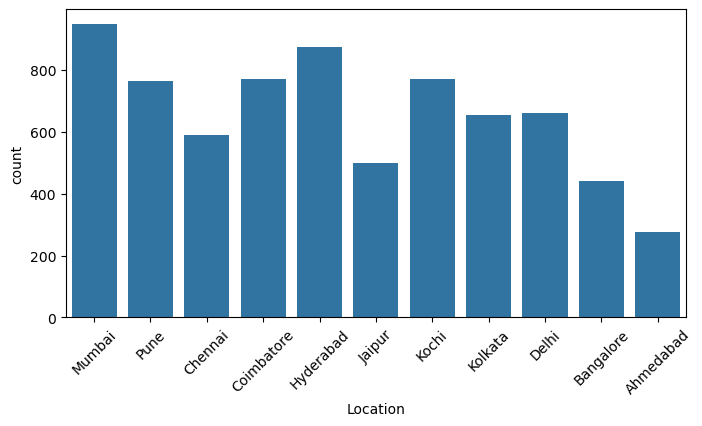

In [51]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Location')
plt.xticks(rotation=45)
plt.show()

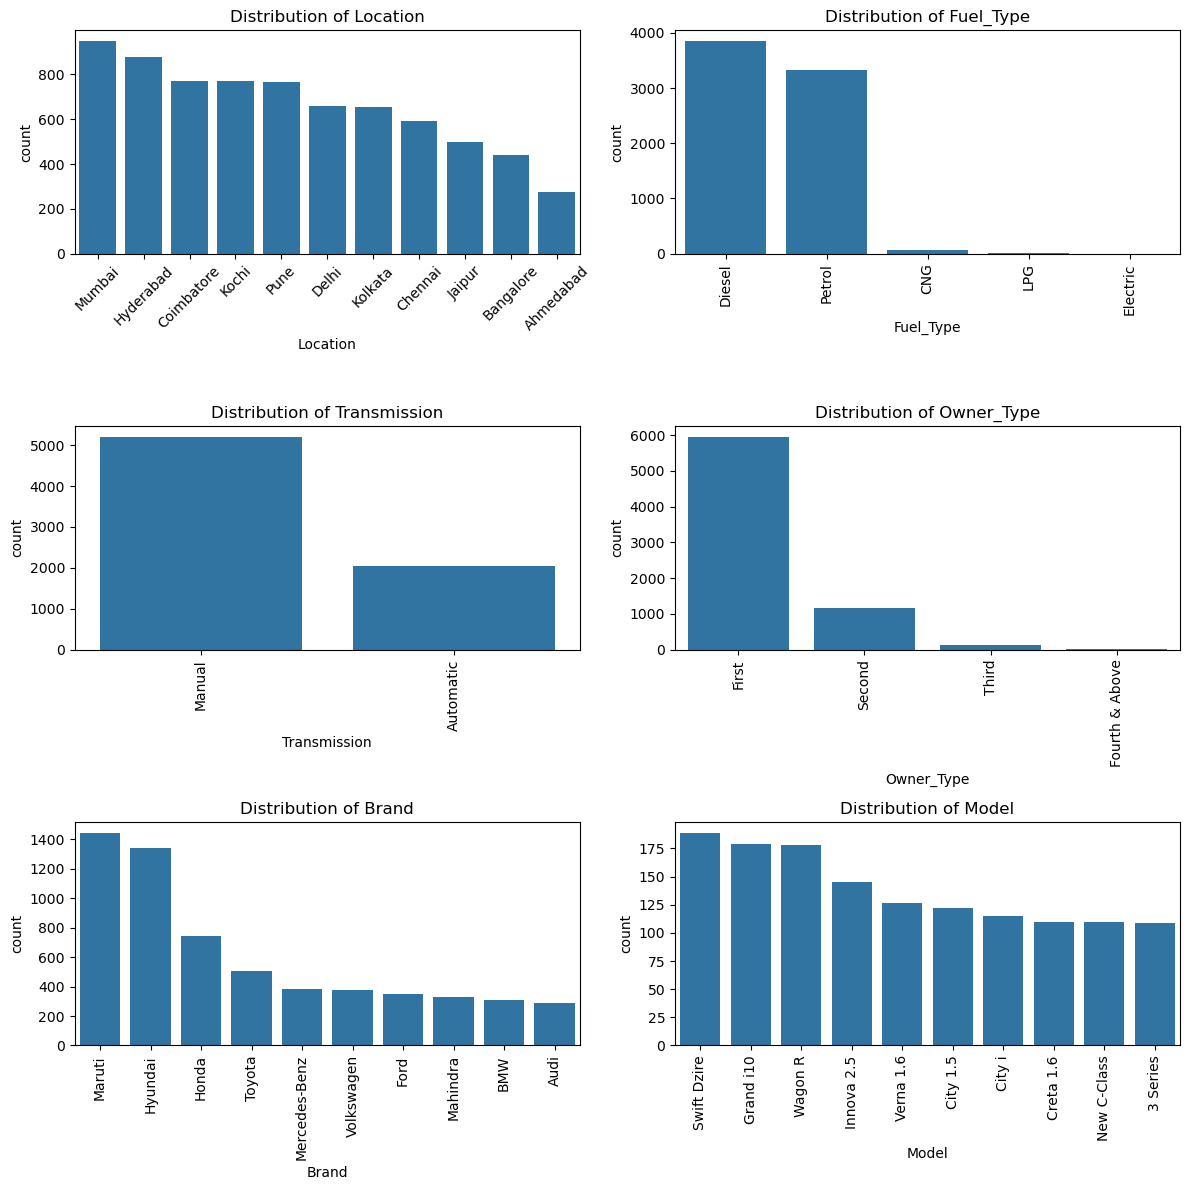

In [52]:
columns =['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand','Model']
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
for i, col, in enumerate(columns):
    ax = axes[i//2, i%2]
    sns.countplot(ax=ax, x=col, data=df, order =df[col].value_counts().index if col not in ['Brand', 'Model']
    else df[col].value_counts().head(10).index)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=45 if col=='Location' else 90)
plt.tight_layout()
plt.show()

From the count plot, we can have below observations
- Geographical Distribution: Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore.
- Fuel Type: Approximately 53% of the cars use diesel fuel, indicating a preference for diesel vehicles due to their performance characteristics.
- Transmission Type: Around 72% of the cars have manual transmission, suggesting a dominant preference for manual over automatic transmissions.
- Ownership: About 82% of the cars are first-owned, reflecting a strong market preference for purchasing vehicles from the first owner.
- Car Brands: Maruti is the most common brand, accounting for 20% of the cars, closely followed by Hyundai with 19%.
- Car Models: The Maruti WagonR is the most popular model among the available cars

#### Bivariate Analysis

Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

- For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

- A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In our example, a pair plot has been used to show the relationship between two Categorical variables.

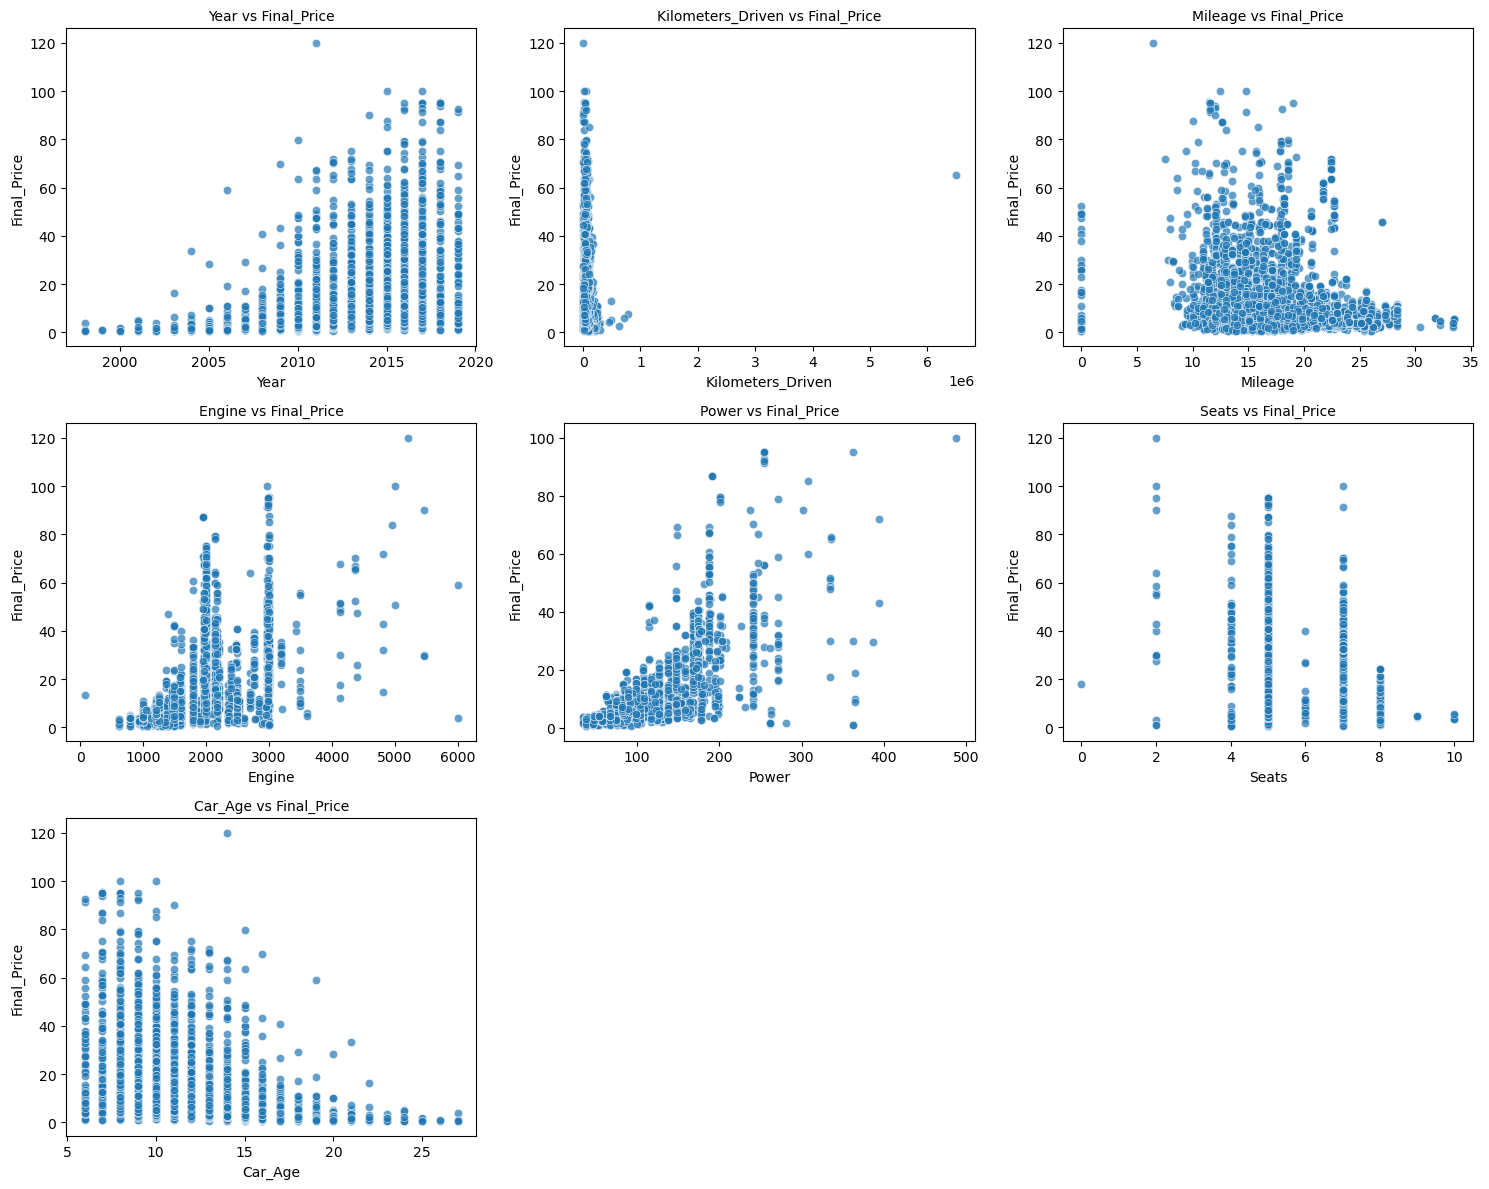

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
num_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Car_Age']

# Initialize a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Iterate through numerical columns and create scatter plots
for i, col in enumerate(num_cols):
    sns.scatterplot(data=df, x=col, y='Final_Price', ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col} vs Final_Price', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Final_Price')

# Remove empty subplots if any
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The visuals provide below insights:

- The variable Year has a positive correlation with price and mileage
- A year has a negative correlation with kilometres driven.
- Mileage is negatively correlated with Power
- As power increases, mileage decreases
- Cars with recent makes are higher in price. As the age of the car increases, the price decreases
- Engine and Power increase, and the price of the car increases

A bar plot can be used to show the relationship between Categorical variables and continuous variables 

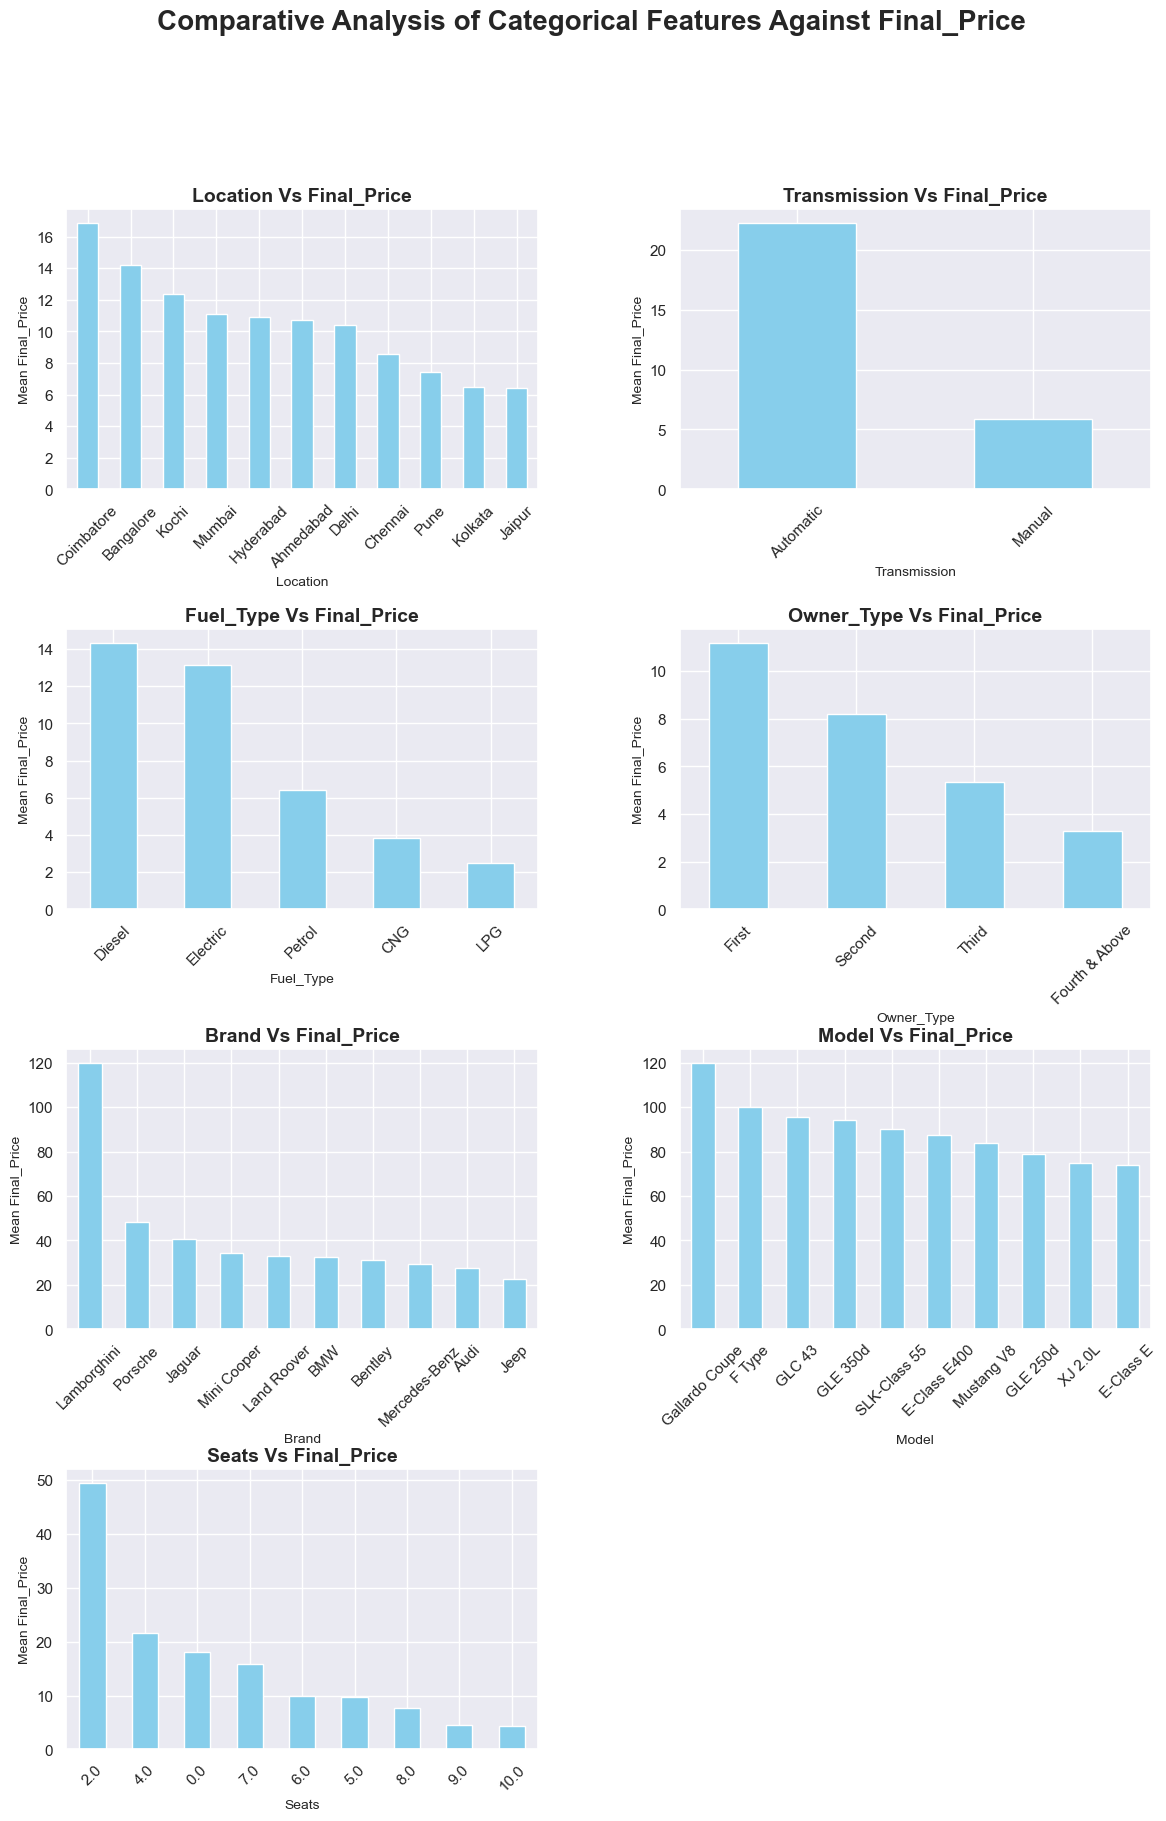

In [57]:
# Set Seaborn theme for consistent styling
sns.set_theme(style="darkgrid")

# Function to plot categorical variables against the target variable
def plot_categorical_vs_price(ax, data, category, target, title, top_n=None):
    grouped_data = data.groupby(category)[target].mean().sort_values(ascending=False)
    if top_n:
        grouped_data = grouped_data.head(top_n)
    grouped_data.plot.bar(ax=ax, color='skyblue')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(category, fontsize=10)
    ax.set_ylabel(f'Mean {target}', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

# Define categories to analyze
categories = [
    ('Location', None), 
    ('Transmission', None), 
    ('Fuel_Type', None), 
    ('Owner_Type', None), 
    ('Brand', 10), 
    ('Model', 10), 
    ('Seats', None)
]

# Create subplots dynamically
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Flatten the grid for easier iteration
fig.suptitle('Comparative Analysis of Categorical Features Against Final_Price', fontsize=20, fontweight='bold')

# Plot each category
for ax, (category, top_n) in zip(axes, categories):
    plot_categorical_vs_price(ax, df, category, 'Final_Price', f'{category} Vs Final_Price', top_n)

# Remove extra subplot if necessary
for ax in axes[len(categories):]:
    fig.delaxes(ax)

# Adjust layout and show the plots
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

Observations
- The price of cars is high in Coimbatore and less price in Kolkata and Jaipur
- Automatic cars have more price than manual cars.
- Diesel and Electric cars have almost the same price, which is maximum, and LPG cars have the lowest price
- First-owner cars are higher in price, followed by a second
- Lamborghini brand is the highest in price
- Gallardocoupe Model is the highest in price
- 2 Seater has the highest price followed by 4 Seater
- The latest model cars are high in price

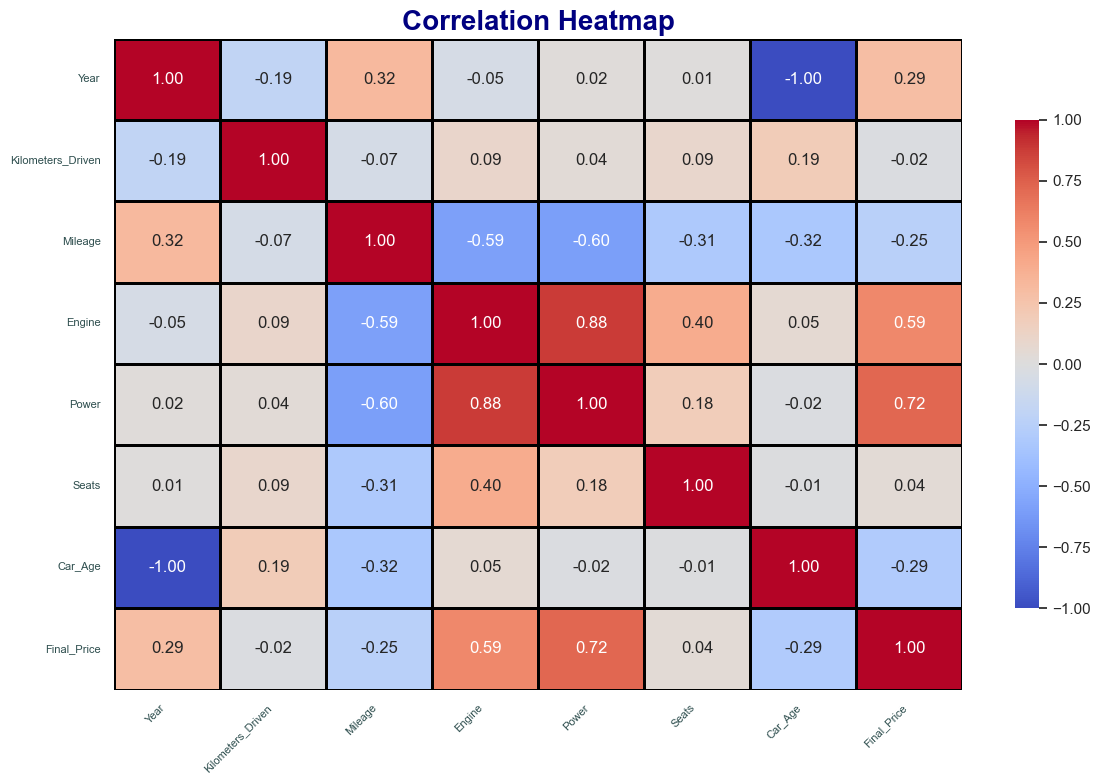

In [59]:
# Compute the correlation matrix
num = df.select_dtypes(include=['number'])
corr_matrix = num.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, 
            linewidths=1, linecolor='black', cbar_kws={"shrink": .75})

# Add title and adjust font sizes for better readability
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold', color='navy')
plt.xticks(fontsize=8, rotation=45, ha='right', color='darkslategray')
plt.yticks(fontsize=8, rotation=0, color='darkslategray')

# Show the plot
plt.tight_layout()
plt.show()

From the Heat map, we can infer the following:
- The engine has a strong positive correlation to Power 0.88
- Price has a positive correlation to Engine 0.59 as well Power 0.72
- Mileage has correlated to Engine, Power, and Price negatively
- Price is moderately positive in correlation to year.
- Kilometer driven has a negative correlation to year and not much impact on the price
- Car age has a negative correlation with Price
- Car Age is positively correlated to Kilometers-Driven as the Age of the car increases; then the kilometer will also increase car has a negative correlation with Mileage this makes sense

Dealing with some issues
- Missing values
- Distribution of the num_cols
- Outliers

In [62]:
df.isna().sum().sort_values(ascending=False)

Power                2789
Final_Price          1055
Seats                  53
Engine                 46
Mileage                 2
Model                   1
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Car_Age                 0
Brand                   0
dtype: int64

In [63]:
import numpy as np

# List categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values for categorical columns with mode
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

# Fill missing values for numerical columns based on skewness
for col in numerical_cols:
    if df[col].isnull().sum() > 0:  # Check if there are missing values
        skewness = df[col].skew()
        if abs(skewness) > 1:  # High skewness threshold
            fill_value = df[col].median()
        else:
            fill_value = df[col].mean()
        df[col] = df[col].fillna(fill_value)

# Display summary of remaining missing values
print("Remaining missing values:")
print(df.isnull().sum())

Remaining missing values:
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Car_Age              0
Brand                0
Model                0
Final_Price          0
dtype: int64


Rows with outliers before dropping:
       Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2328    Chennai  2017            6500000    Diesel    Automatic      First   
3999  Hyderabad  2012             125000    Petrol    Automatic      First   

      Mileage  Engine  Power  Seats  Car_Age Brand      Model  Final_Price  
2328    15.97  2993.0   88.8    5.0        8   BMW  X5 xDrive         65.0  
3999    10.50  3197.0   88.8    0.0       13  Audi     A4 3.2         18.0  


C:\Users\User\AppData\Local\Temp\ipykernel_14972\4152777879.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Final_Price_log'] = np.log1p(df_cleaned['Final_Price'])  # log(1 + price) to handle 0 or small values
C:\Users\User\AppData\Local\Temp\ipykernel_14972\4152777879.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Kilometers_Driven_log'] = np.log1p(df_cleaned['Kilometers_Driven'])  # log(1 + kilometers) to avoid log(0)


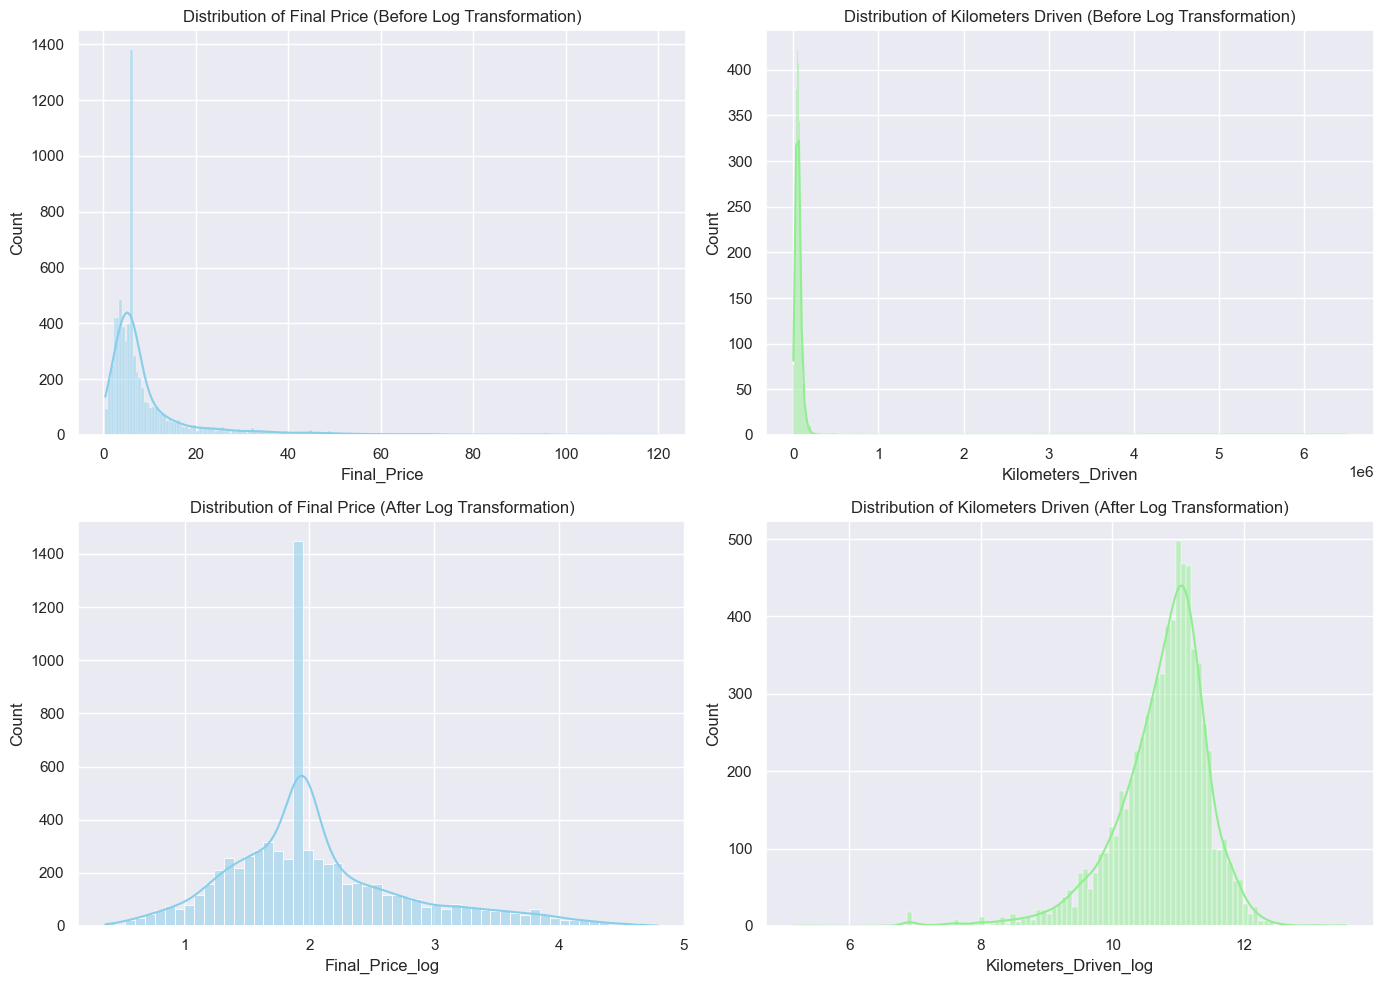

In [64]:
# Show rows before dropping
outliers = df[(df['Seats'] == 0) | (df['Kilometers_Driven'] > 4000000)]
print("Rows with outliers before dropping:")
print(outliers)

# Drop rows with invalid Seats and Kilometers_Driven > 4,000,000
df_cleaned = df[(df['Seats'] != 0) & (df['Kilometers_Driven'] <= 4000000)]

# Apply log transformation to 'Final_Price' and 'Kilometers_Driven'
df_cleaned['Final_Price_log'] = np.log1p(df_cleaned['Final_Price'])  # log(1 + price) to handle 0 or small values
df_cleaned['Kilometers_Driven_log'] = np.log1p(df_cleaned['Kilometers_Driven'])  # log(1 + kilometers) to avoid log(0)

# Visualize the distribution before and after the transformation

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Before Transformation
sns.histplot(df['Final_Price'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Final Price (Before Log Transformation)')

sns.histplot(df['Kilometers_Driven'], kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution of Kilometers Driven (Before Log Transformation)')

# After Log Transformation
sns.histplot(df_cleaned['Final_Price_log'], kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Distribution of Final Price (After Log Transformation)')

sns.histplot(df_cleaned['Kilometers_Driven_log'], kde=True, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Distribution of Kilometers Driven (After Log Transformation)')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

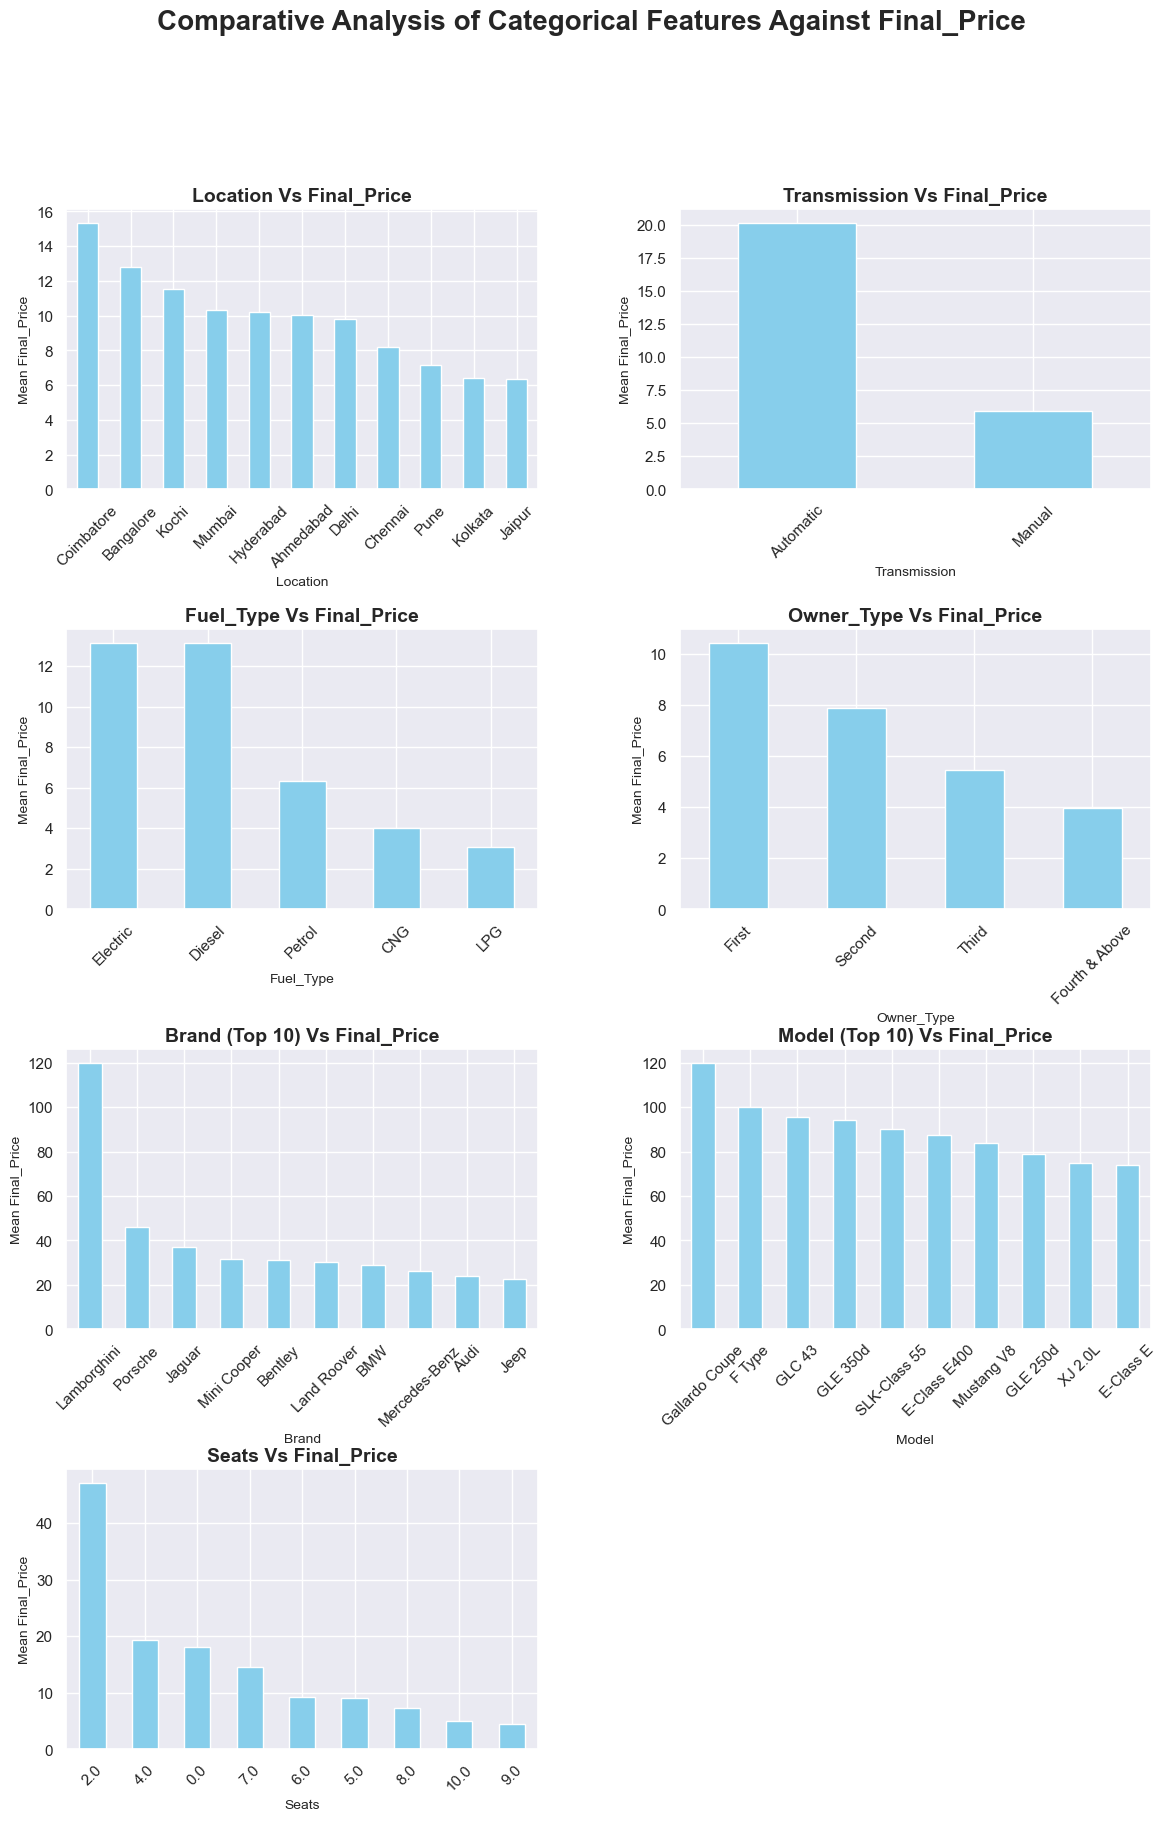

In [69]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme for consistent styling
sns.set_theme(style="darkgrid")

# Define categories and their corresponding titles
categories = [
    ('Location', 'Location Vs Final_Price', None),
    ('Transmission', 'Transmission Vs Final_Price', None),
    ('Fuel_Type', 'Fuel_Type Vs Final_Price', None),
    ('Owner_Type', 'Owner_Type Vs Final_Price', None),
    ('Brand', 'Brand (Top 10) Vs Final_Price', 10),
    ('Model', 'Model (Top 10) Vs Final_Price', 10),
    ('Seats', 'Seats Vs Final_Price', None)
]

# Create subplots dynamically
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Flatten the grid for easier iteration
fig.suptitle('Comparative Analysis of Categorical Features Against Final_Price', fontsize=20, fontweight='bold')

# Loop through categories to plot
for i, (category, title, top_n) in enumerate(categories):
    ax = axes[i]
    grouped_data = df.groupby(category)['Final_Price'].mean().sort_values(ascending=False)
    if top_n:  # Select top N if specified
        grouped_data = grouped_data.head(top_n)
    grouped_data.plot.bar(ax=ax, color='skyblue')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(category, fontsize=10)
    ax.set_ylabel('Mean Final_Price', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot if necessary
for ax in axes[len(categories):]:
    fig.delaxes(ax)

# Adjust layout and show the plots
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

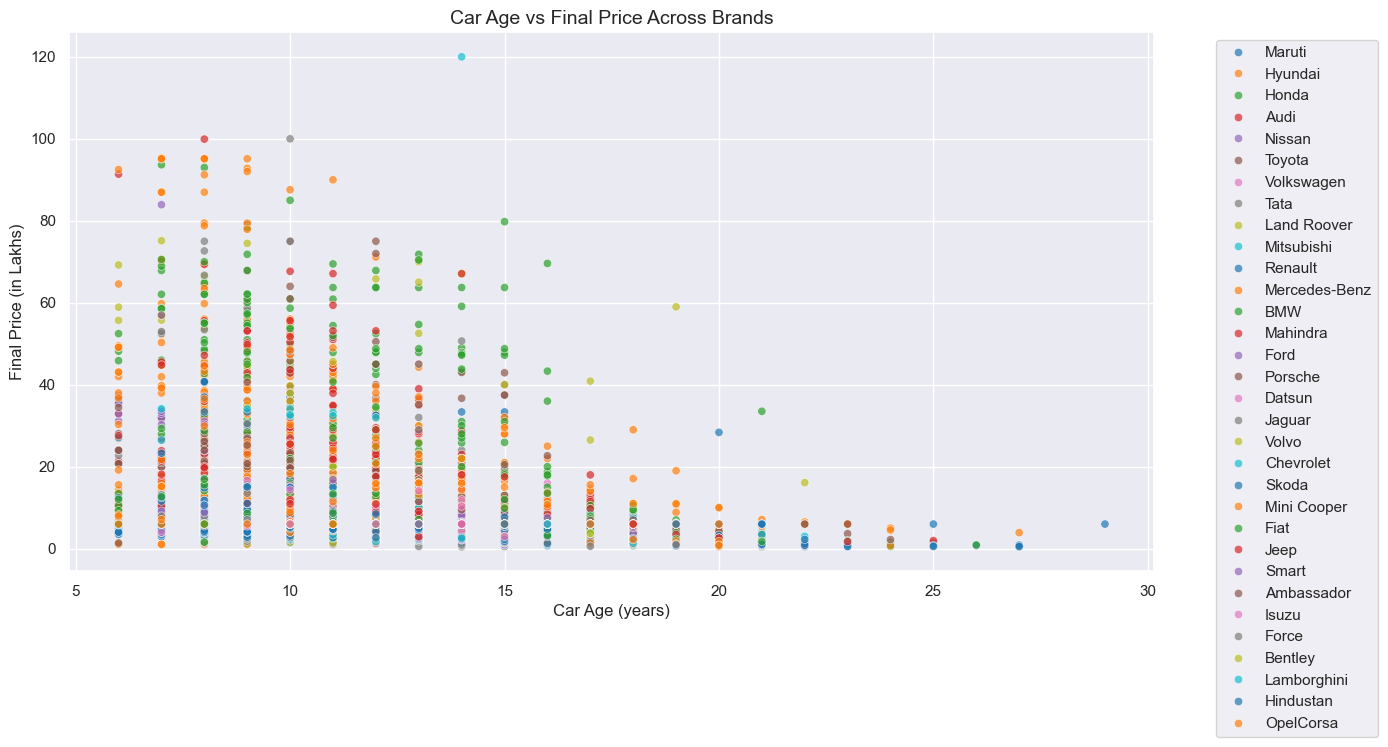

In [65]:
# Visualize Car Age vs Final Price grouped by Brand
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Car_Age', y='Final_Price', hue='Brand', alpha=0.7, palette='tab10')
plt.title('Car Age vs Final Price Across Brands', fontsize=14)
plt.xlabel('Car Age (years)', fontsize=12)
plt.ylabel('Final Price (in Lakhs)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [66]:
# Statistical significance test
import scipy.stats as stats
# Example for one brand (e.g., 'Toyota')
toyota_data = df[df['Brand'] == 'Toyota']
corr, p_value = stats.pearsonr(toyota_data['Car_Age'], toyota_data['Final_Price'])
print(f"Correlation between Car Age and Price for Toyota: {corr:.2f}, p-value: {p_value:.4f}")


Correlation between Car Age and Price for Toyota: -0.56, p-value: 0.0000


Location
Coimbatore    15.354741
Bangalore     12.824068
Kochi         11.555661
Mumbai        10.347935
Hyderabad     10.227352
Ahmedabad     10.013455
Delhi          9.791394
Chennai        8.170694
Pune           7.156850
Kolkata        6.386621
Jaipur         6.351643
Name: Final_Price, dtype: float64


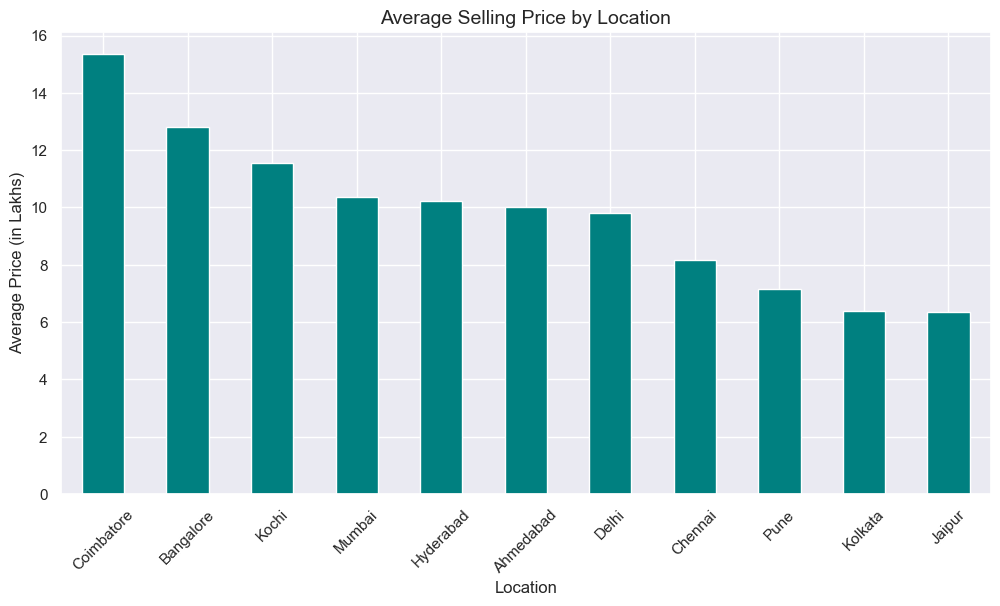

In [67]:
# Group by Location and calculate mean price
price_by_location = df.groupby('Location')['Final_Price'].mean().sort_values(ascending=False)
print(price_by_location)

# Visualize price distribution by location
plt.figure(figsize=(12, 6))
price_by_location.plot(kind='bar', color='teal')
plt.title('Average Selling Price by Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Price (in Lakhs)', fontsize=12)
plt.xticks(rotation=45)
plt.show()




In [68]:
# Feature importance using correlation with Final Price
correlations = df[num_cols].corr()['Final_Price'].sort_values(ascending=False)
print(correlations)

# Bar plot of feature importance
plt.figure(figsize=(8, 5))
correlations.drop('Final_Price').plot(kind='bar', color='orange')
plt.title('Feature Importance Based on Correlation with Final Price', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45)
plt.show()

KeyError: 'Final_Price'

In [ ]:
import scipy.stats as stats

# Create a dictionary to store results
brand_correlation_results = []

# Loop through each brand
for brand in df['Brand'].unique():
    brand_data = df[df['Brand'] == brand]
    
    # Check if there's enough data to compute correlation
    if len(brand_data) > 1:  # At least 2 points are needed for correlation
        corr, p_value = stats.pearsonr(brand_data['Car_Age'], brand_data['Final_Price'])
        brand_correlation_results.append({
            'Brand': brand,
            'Correlation': corr,
            'P-Value': p_value
        })

# Convert results to DataFrame for better visualization
correlation_df = pd.DataFrame(brand_correlation_results)

# Display results sorted by the strongest correlations
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
print(correlation_df)

# Optionally, filter significant correlations (e.g., p-value < 0.05)
significant_results = correlation_df[correlation_df['P-Value'] < 0.05]
print("\nSignificant Correlations (p-value < 0.05):")
print(significant_results)